# Basic Usage

The goal of this notebook is to demonstrate the usage of the `mixture_sample` function, which combines different sampling strategies to select experimental conditions. The `mixture_sample` function takes a pool of experimental conditions, a temperature parameter, a list of samplers with their weights, a dictionary of parameters for the samplers, and an optional number of samples to return.

We begin with importing the necessary packages.

In [ ]:
# Uncomment the following lines when running on Google Colab
# !pip install "autora[experimentalits-mixture]"
# !pip install "autora[experimentalist-falsification]"
# !pip install "autora[experimentalist-novelty]"

ModuleNotFoundError: No module named 'autora'

In [132]:
from autora.experimentalist.mixture import mixture_sample
from autora.experimentalist.falsification import falsification_sample, falsification_score_sample
from autora.experimentalist.novelty import novelty_sampler, novelty_score_sample
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression


### Example: Sampling fom a Sine Function
In this example, we will consider ground truth in a form of the sine function. We will then use mixture_sampler to choose experimental conditions according to the 1) novelty strategy with different degrees of randomness and 2) a mixture of novelty and falsification strategies. 

First, we define the experiment conditions $X$ and the observations $Y$. We consider a domain of $X \in [0, 2\pi]$.

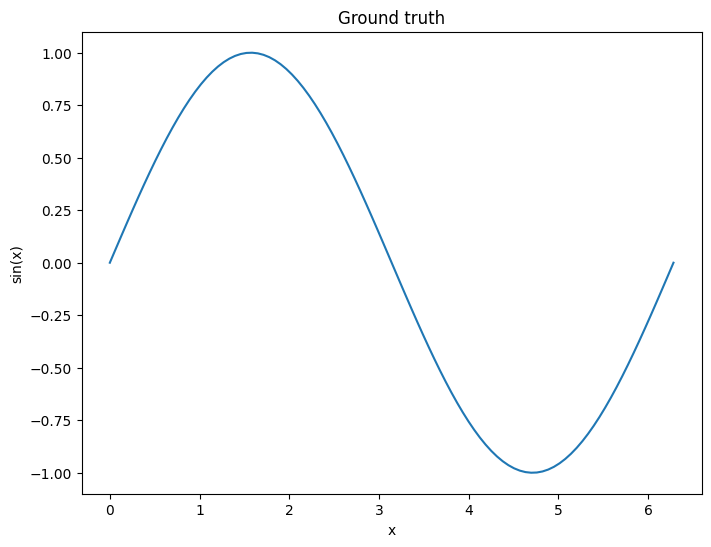

In [138]:
# Define the domain
x = np.linspace(0, 2*np.pi, 100)
# Compute the values of the sine function at the points in the domain
y = np.sin(x)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y, "-")

# Add labels and title
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.title('Ground truth')

# Display the plot
plt.show()

### Mixture sampler using the novelty strategy

Now, we can try to use a mixture sampler to sample using the novelty strategy with different levels of randomness. 

In [139]:
new_X = np.linspace(0, 2 * np.pi, 100)
# old points
X = np.linspace(0, 0.5, 50)
Y = np.sin(X)

params = {
    "novelty": {"reference_conditions": X},
}

##### Low temperature: points are sampled deterministically.

In [140]:
selected_conditions = mixture_sample(
    conditions=new_X,
    temperature=0.01,
    samplers=[[novelty_score_sample, "novelty", [0.8, 0.2]]],
    params=params,
    num_samples=10
)

In [141]:
selected_conditions

array([6.28318531, 6.21971879, 6.15625227, 6.09278575, 6.02931923,
       5.96585272, 5.9023862 , 5.83891968, 5.77545316, 5.71198664])

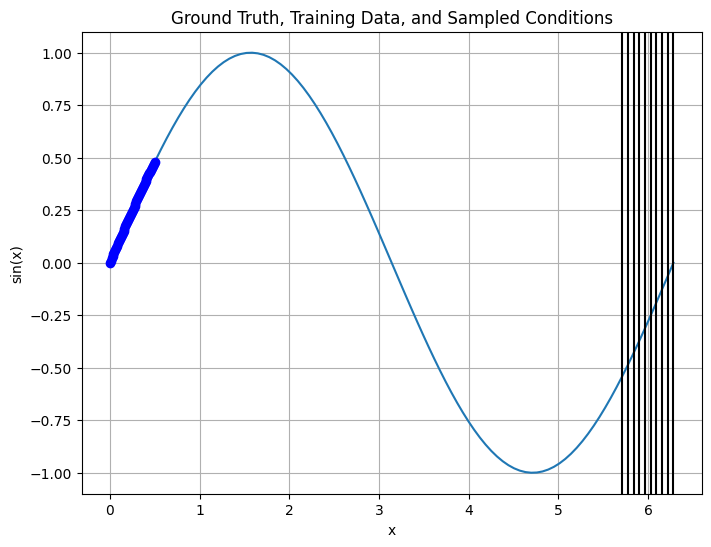

In [143]:
# Define the domain
x = np.linspace(0, 2*np.pi, 100)

# Compute the values of the sine function at the points in the domain
y = np.sin(x)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y, "-")
plt.plot(X, Y, "bo")

# Add vertical lines at the sampled x-values
for val in selected_conditions:
    plt.axvline(x=val, color='black')

# Add labels and title
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.title('Ground Truth, Training Data, and Sampled Conditions')

# Display the plot
plt.grid(True)
plt.show()


##### High temperature: randomness is added to the sampling process.

In [144]:
selected_conditions = mixture_sample(
    conditions=new_X,
    temperature=2,
    samplers=[[novelty_score_sample, "novelty", [0.8, 0.2]]],
    params=params,
    num_samples=10
)

In [145]:
selected_conditions

array([2.66559377, 5.45812057, 5.33118753, 6.21971879, 0.6981317 ,
       5.58505361, 6.28318531, 5.26772102, 3.99839065, 4.95038842])

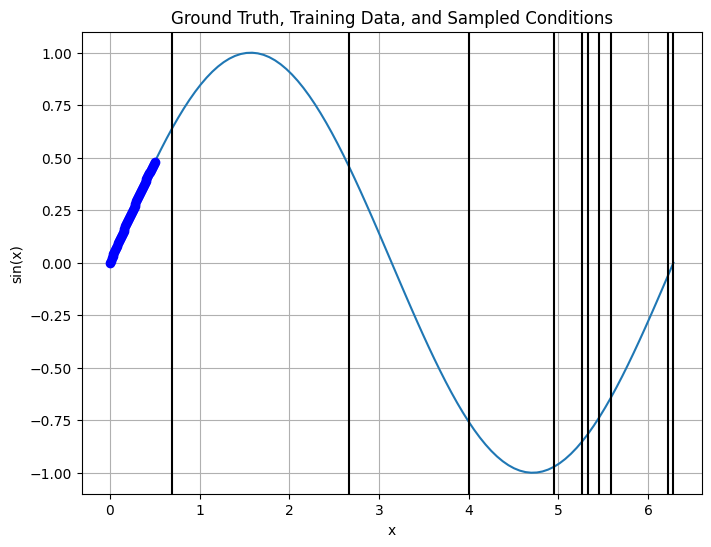

In [146]:
# Define the domain
x = np.linspace(0, 2*np.pi, 100)

# Compute the values of the sine function at the points in the domain
y = np.sin(x)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y, "-")
plt.plot(X, Y, "bo")

# Add vertical lines at the sampled x-values
for val in selected_conditions:
    plt.axvline(x=val, color='black')

# Add labels and title
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.title('Ground Truth, Training Data, and Sampled Conditions')

# Display the plot
plt.grid(True)
plt.show()


### Mixture experimentalist combining novelty and falsification

In [147]:
model = LinearRegression()
model.fit(X.reshape(-1, 1), Y)

LinearRegression()

Now, we have new conditions to choose sampling from!

In [148]:
new_X = np.linspace(0, 2 * np.pi, 100)

params = {
    "novelty": {"reference_conditions": X},
    "falsification": {"reference_conditions": X, "reference_observations": Y, "model": model}
}


In [149]:
selected_conditions = mixture_sample(
    conditions=new_X,
    temperature=0.01,
    samplers=[[novelty_score_sample, "novelty", [0.7, 0.1]], [falsification_score_sample, "falsification", [0.5, 0]]],
    params=params,
    num_samples=10
)

In [150]:
selected_conditions

array([0.57119866, 0.63466518, 0.6981317 , 0.50773215, 0.76159822,
       0.82506474, 6.28318531, 0.88853126, 6.21971879, 6.09278575])

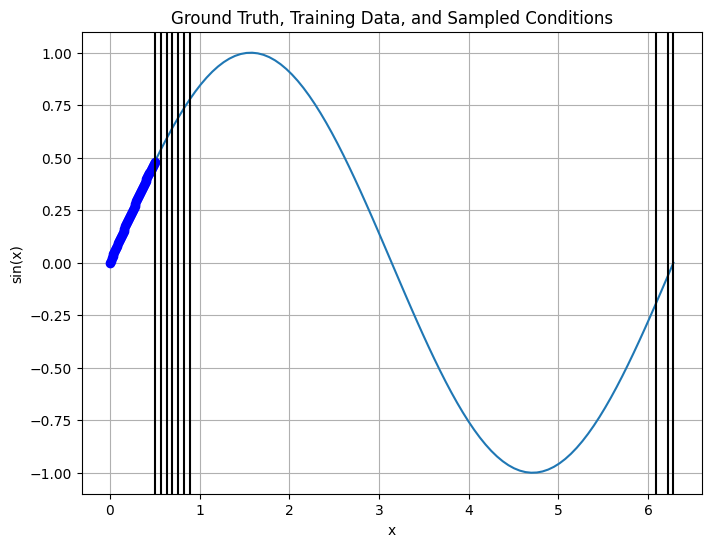

In [151]:
x = np.linspace(0, 2*np.pi, 100)

# Compute the values of the sine function at the points in the domain
y = np.sin(x)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x, y, "-")
plt.plot(X, Y, "bo")

# Add vertical lines at the sampled x-values
for val in selected_conditions:
    plt.axvline(x=val, color='black')

# Add labels and title
plt.xlabel('x')
plt.ylabel('sin(x)')
plt.title('Ground Truth, Training Data, and Sampled Conditions')

# Display the plot
plt.grid(True)
plt.show()
